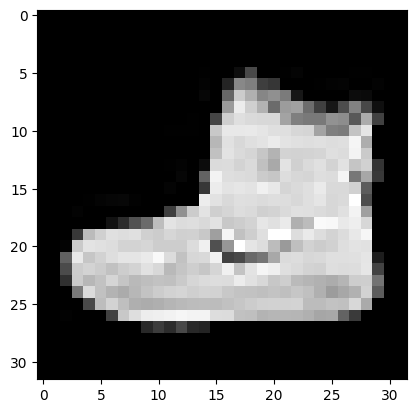

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 93ms/step - accuracy: 0.6123 - loss: 0.0689 - val_accuracy: 0.6144 - val_loss: 0.0286
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.6151 - loss: 0.0277 - val_accuracy: 0.6151 - val_loss: 0.0266
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.6162 - loss: 0.0257 - val_accuracy: 0.6141 - val_loss: 0.0251
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.6150 - loss: 0.0248 - val_accuracy: 0.6159 - val_loss: 0.0246
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.6170 - loss: 0.0242 - val_accuracy: 0.6146 - val_loss: 0.0240
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.6166 - loss: 0.0237 - val_accuracy: 0.6144 - val_loss: 0.0236
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.6162 - loss: 0.0234 - val_accuracy: 0.6153 - val_loss: 0.0232
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 55s 74ms/step - accuracy: 0.6170 - loss: 0.0230 - 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import tensorflow as tf

# Load and preprocess the Fashion MNIST dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

# Normalize and adjust dimensions for Fashion MNIST
def preprocess(imgs):
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), 'constant', constant_values=0.0)
    imgs = np.expand_dims(imgs, -1)  # Add channel dimension
    return imgs / 255.0

x_train_fashion = preprocess(x_train_fashion)
x_test_fashion = preprocess(x_test_fashion)

# One-hot encode Fashion MNIST labels
y_train_fashion = to_categorical(y_train_fashion, 10)
y_test_fashion = to_categorical(y_test_fashion, 10)

# Display a Fashion MNIST image
plt.imshow(x_train_fashion[0].reshape(32, 32), cmap='gray')
plt.show()

# Encoder structure
image_size = 32
channels = 1
embedding_dim = 2

encoder_input = layers.Input(shape=(image_size, image_size, channels), name="encoder_input")
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(encoder_input)
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)

# Flatten and Dense layer for embedding
shape_before_flattening = tf.keras.backend.int_shape(x)
x = layers.Flatten()(x)
encoder_output = layers.Dense(embedding_dim, name="encoder_output")(x)
encoder = models.Model(encoder_input, encoder_output, name="encoder")

# Decoder structure
decoder_input = layers.Input(shape=(embedding_dim,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoder_output = layers.Conv2DTranspose(channels, (3, 3), activation='sigmoid', padding='same', name='decoder_output')(x)
decoder = models.Model(decoder_input, decoder_output, name="decoder")

# Full autoencoder model
autoencoder_input = encoder_input
autoencoder_output = decoder(encoder_output)
autoencoder = models.Model(autoencoder_input, autoencoder_output, name="autoencoder")

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the autoencoder
autoencoder.fit(x_train_fashion, x_train_fashion, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate autoencoder on test data
loss, accuracy = autoencoder.evaluate(x_test_fashion, x_test_fashion)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')